In [53]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns

import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Problem tanımı ve amaç:
Bu veri seti ilk kez 2012 yılında yayınlanan 155 ülkeyi mutluluk seviyelerine göre sıralayan dünya mutluluk raporlarından oluşmaktadır.

Mutluluk seviyelerini belirlemek için 6 faktör -ekonomik üretim, sosyal destek, yaşam beklentisi, özgürlük, yolsuzluğun olmaması ve cömertlik - göz önüne alınmaktadır. Amaç günümüz dünyasında daha mutlu toplumlar oluşmasına katkı sağlamak için aşağıdaki gibi sorulara cevaplar arayabilmektir.

Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?
2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?
Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?


In [11]:
df_1 = pd.read_csv('2015.csv', low_memory = False)
df_1.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

In [12]:
df_2 = pd.read_csv('2016.csv', low_memory = False)

In [13]:
df_3 = pd.read_csv('2017.csv', low_memory = False)

In [14]:
df_4 = pd.read_csv('2018.csv', low_memory = False)
df_5 = pd.read_csv('2019.csv', low_memory = False)

In [21]:
#TÜM YILLLARIN SÜTUN VE SATIRLARINI GÖZLEMLEMEK VE BİRBİRİYLE KIYAS İÇİN SÜTUN İSİMLERİNDE DENKLİK SAĞLAMAK GEREKİYOR:

In [15]:
df_1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
df_2.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [18]:
df_3.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [19]:
df_4.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [20]:
df_5.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [27]:
df_1.columns=df_1.columns.str.replace(' ','_')
df_2.columns=df_2.columns.str.replace(' ','_')
df_3.columns=df_3.columns.str.replace(' ','_')
df_4.columns=df_4.columns.str.replace(' ','_')
df_5.columns=df_5.columns.str.replace(' ','_')

In [30]:
df_1.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [32]:
df_3.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [33]:
df_3 = df_3.rename(columns={"Happiness.Score":"Happiness_Score" })

In [34]:
df_4.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [35]:
df_4 = df_4.rename(columns={"Score":"Happiness_Score","Country_or_region":"Country" })

In [51]:
df_5 = df_5.rename(columns={"Score":"Happiness_Score","Country_or_region":"Country" })

# Her Yıla Ait Mutluluk Sıralaması

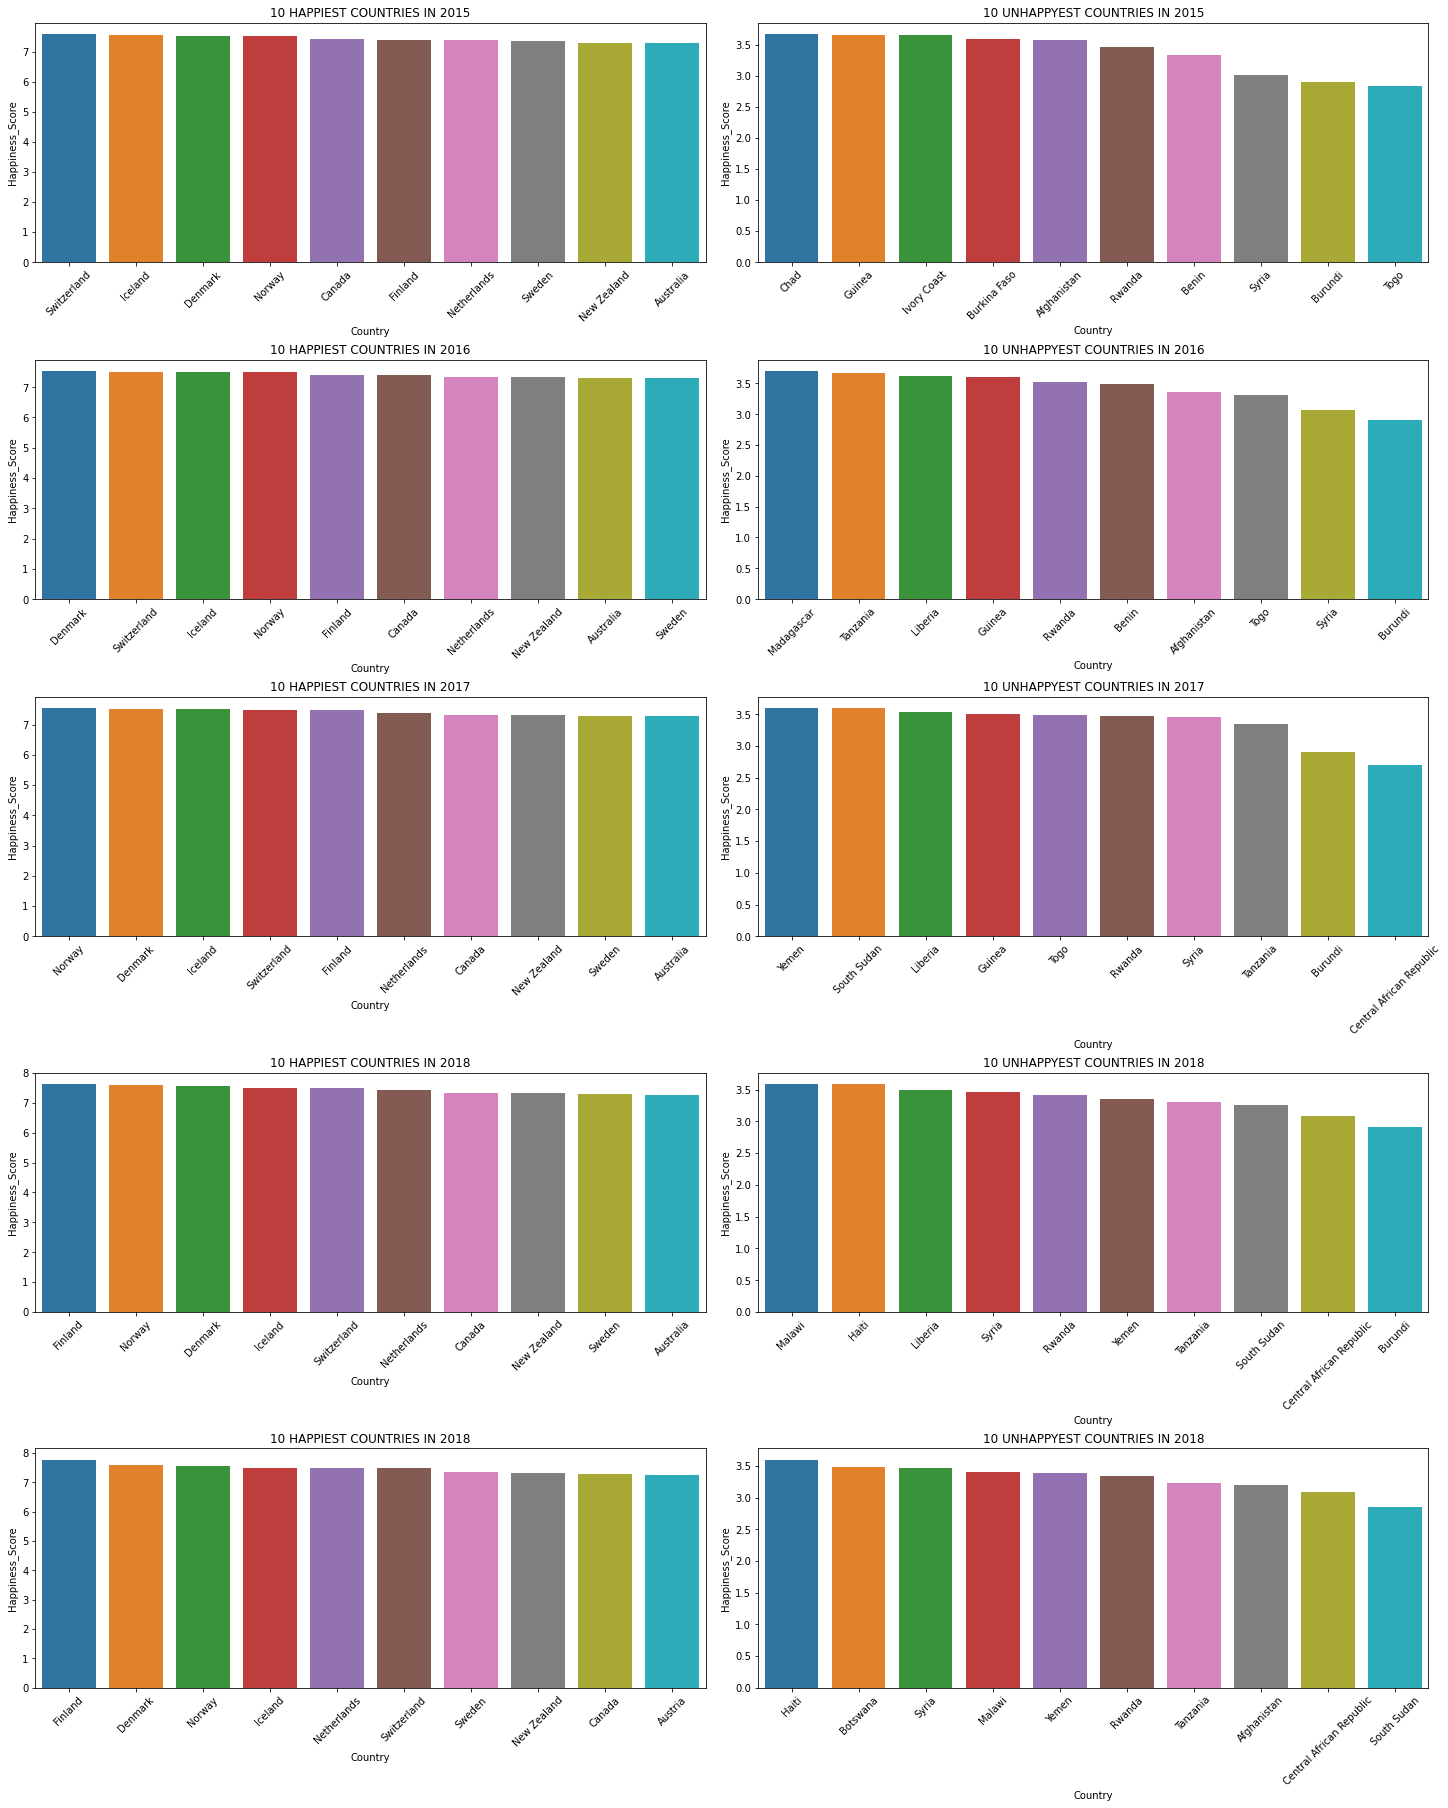

In [66]:

#2015:
sort_data1 = df_1.head(10)
sad_data1 = df_1.tail(10)

#2016
sort_data2 = df_2.head(10)
sad_data2 = df_2.tail(10)

#2017
sort_data3 = df_3.head(10)
sad_data3 = df_3.tail(10)

#2018
sort_data4 = df_4.head(10)
sad_data4 = df_4.tail(10)

#2019
sort_data5 = df_5.head(10)
sad_data5 = df_5.tail(10)

f, axs = plt.subplots(5,2, figsize = (20,25), constrained_layout = True)
#2015;
ax=sns.barplot(x="Country", y="Happiness_Score", data=sort_data1 , ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country", y="Happiness_Score", data=sad_data1 , ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)

#2016;
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_data2, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sad_data2, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)

#2017;
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_data3, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sad_data3, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)


#2018;
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_data4, ax = axs[3, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sad_data4, ax = axs[3, 1])
ax.tick_params(axis = 'x', rotation = 45)


#2019;

ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_data5, ax = axs[4, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sad_data5, ax = axs[4, 1])
ax.tick_params(axis = 'x', rotation = 45)


axs[0, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2015')
axs[0, 1].title.set_text('10 UNHAPPYEST COUNTRIES IN 2015')

axs[1, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2016')
axs[1, 1].title.set_text('10 UNHAPPYEST COUNTRIES IN 2016')

axs[2, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2017')
axs[2, 1].title.set_text('10 UNHAPPYEST COUNTRIES IN 2017')

axs[3, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2018')
axs[3, 1].title.set_text('10 UNHAPPYEST COUNTRIES IN 2018')

axs[4, 0].title.set_text('10 HAPPIEST COUNTRIES IN 2018')
axs[4, 1].title.set_text('10 UNHAPPYEST COUNTRIES IN 2018')

0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
5        Finland
6    Netherlands
7         Sweden
8    New Zealand
9      Australia
Name: Country, dtype: object

# 2015-2016 ve 2016-2017 Mutluluk Değişimleri

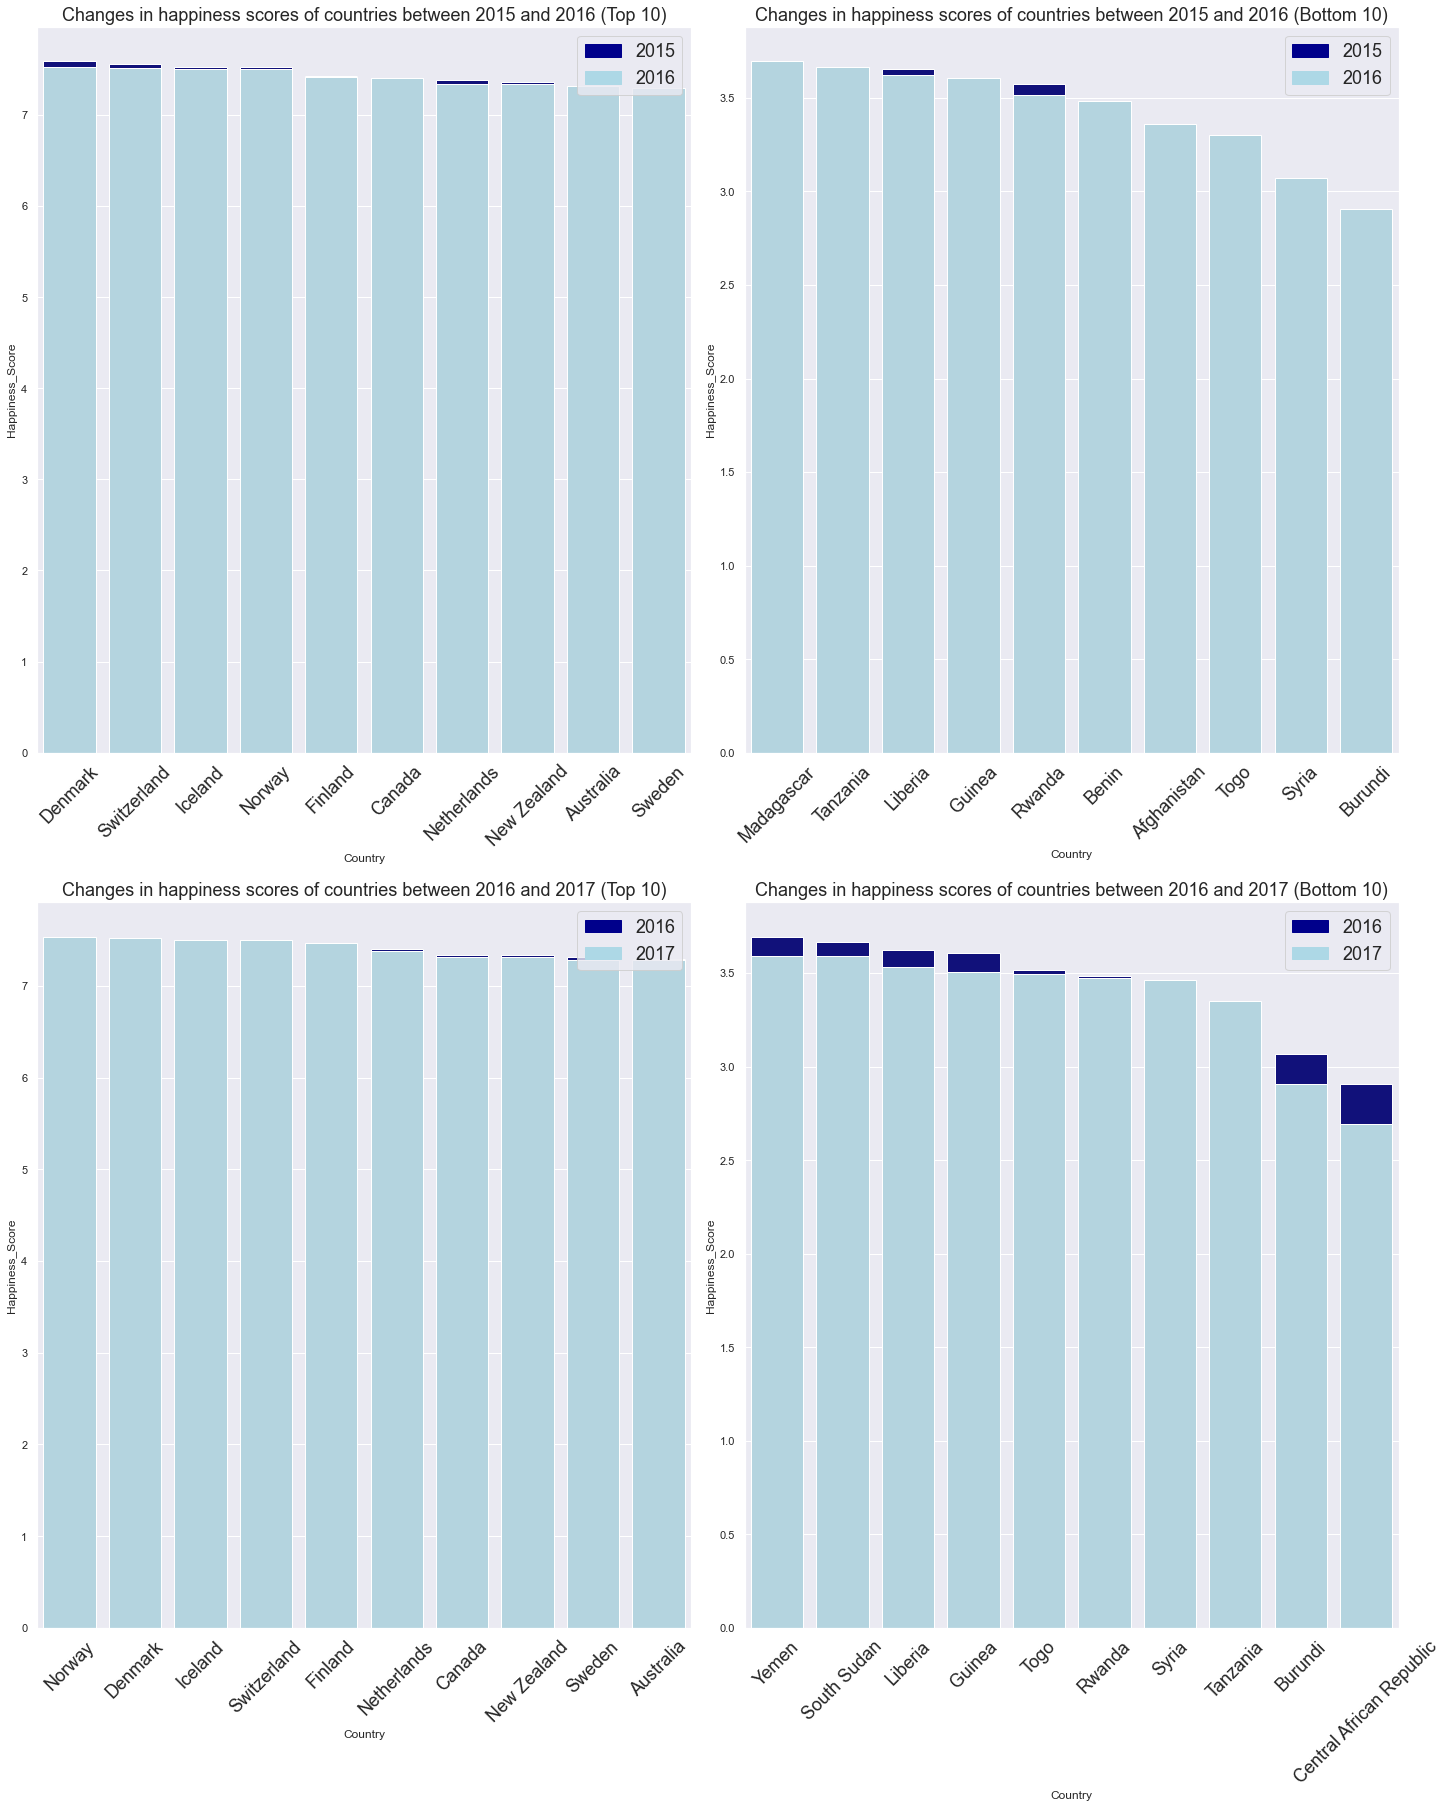

In [151]:
#2015-2016
import matplotlib.patches as mpatches
sns.set(style="darkgrid")
f, axs = plt.subplots(2,2, figsize = (20,25), constrained_layout = True)

ax = sns.barplot(x="Country",  y="Happiness_Score", data=sort_data1, color='darkblue',ax = axs[0,0])
ax = sns.barplot(x="Country", y="Happiness_Score", data=sort_data2, estimator=sum, ci=None,  color='lightblue',ax= axs[0,0])
ax.tick_params(axis = 'x', rotation = 45, labelsize=18)

top_bar1 = mpatches.Patch(color='darkblue', label='2015')
bottom_bar1 = mpatches.Patch(color='lightblue', label='2016')


ax = sns.barplot(x="Country",  y="Happiness_Score", data=sad_data1, color='darkblue',ax = axs[0,1])
ax = sns.barplot(x="Country", y="Happiness_Score", data=sad_data2, estimator=sum, ci=None,  color='lightblue',ax= axs[0,1])
ax.tick_params(axis = 'x', rotation = 45, labelsize=18)

top_bar2 = mpatches.Patch(color='darkblue', label='2015')
bottom_bar2 = mpatches.Patch(color='lightblue', label='2016')



#2016-2017
#mutluluktop10
ax = sns.barplot(x="Country",  y="Happiness_Score", data=sort_data2, color='darkblue',ax = axs[1,0])
ax = sns.barplot(x="Country", y="Happiness_Score", data=sort_data3, estimator=sum, ci=None,  color='lightblue',ax = axs[1,0])
ax.tick_params(axis = 'x', rotation = 45, labelsize=18)
top_bar3 = mpatches.Patch(color='darkblue', label='2016')
bottom_bar3 = mpatches.Patch(color='lightblue', label='2017')


#mutlulukbottom10
ax = sns.barplot(x="Country",  y="Happiness_Score", data=sad_data2, color='darkblue',ax = axs[1,1])
ax = sns.barplot(x="Country", y="Happiness_Score", data=sad_data3, estimator=sum, ci=None,  color='lightblue',ax = axs[1,1])
ax.tick_params(axis = 'x', rotation = 45, labelsize=18)
top_bar4 = mpatches.Patch(color='darkblue', label='2016')
bottom_bar4 = mpatches.Patch(color='lightblue', label='2017')




axs[0,0].legend(handles=[top_bar1, bottom_bar1],fontsize=18)
axs[0,1].legend(handles=[top_bar2, bottom_bar2],fontsize=18)
axs[1,0].legend(handles=[top_bar3, bottom_bar3],fontsize=18)
axs[1,1].legend(handles=[top_bar4, bottom_bar4],fontsize=18)

axs[0,0].title.set_text('Changes in happiness scores of countries between 2015 and 2016 (Top 10)')
axs[0,1].title.set_text('Changes in happiness scores of countries between 2015 and 2016 (Bottom 10)')
axs[0,0].title.set_size(18)
axs[0,1].title.set_size(18)



axs[1,0].title.set_text('Changes in happiness scores of countries between 2016 and 2017 (Top 10)')
axs[1,1].title.set_text('Changes in happiness scores of countries between 2016 and 2017 (Bottom 10)')
axs[1,0].title.set_size(18)
axs[1,1].title.set_size(18)




plt.show()